In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100


In [3]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize images (scale pixel values to [0,1])
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical (one-hot encoding)
num_classes = 100
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)


In [4]:
# Residual Block Function
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    # First Convolution
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second Convolution
    x = layers.Conv2D(filters, kernel_size, strides=1, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Adjust shortcut if needed
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding="same", use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add residual connection
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

# ResNet-18 Model
def build_resnet18(input_shape=(32, 32, 3), num_classes=100):
    inputs = layers.Input(shape=input_shape)

    # Initial Convolution
    x = layers.Conv2D(64, 3, strides=1, padding="same", use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual Blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    # Classification Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, x)
    return model


In [ ]:
# Build the model
resnet18_model = build_resnet18()

# Compile Model
resnet18_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train Model
history = resnet18_model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2)


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 155ms/step - accuracy: 0.1054 - loss: 3.9820 - val_accuracy: 0.0697 - val_loss: 5.1286
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 128ms/step - accuracy: 0.2902 - loss: 2.7665 - val_accuracy: 0.2824 - val_loss: 3.0137
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step - accuracy: 0.4356 - loss: 2.1050 - val_accuracy: 0.3857 - val_loss: 2.4134
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.5402 - loss: 1.6468 - val_accuracy: 0.4083 - val_loss: 2.3260
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.6288 - loss: 1.2943 - val_accuracy: 0.3939 - val_loss: 2.6049
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.7259 - loss: 0.9340 - val_accuracy: 0.4449 - val_loss: 2.3460
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.8215 - loss: 0.6095 - val_accuracy: 0.4434 - val_loss: 2.5043
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.8929 - loss: 0

313/313 - 5s - 17ms/step - accuracy: 0.4661 - loss: 2.7784
Test Accuracy: 0.4661


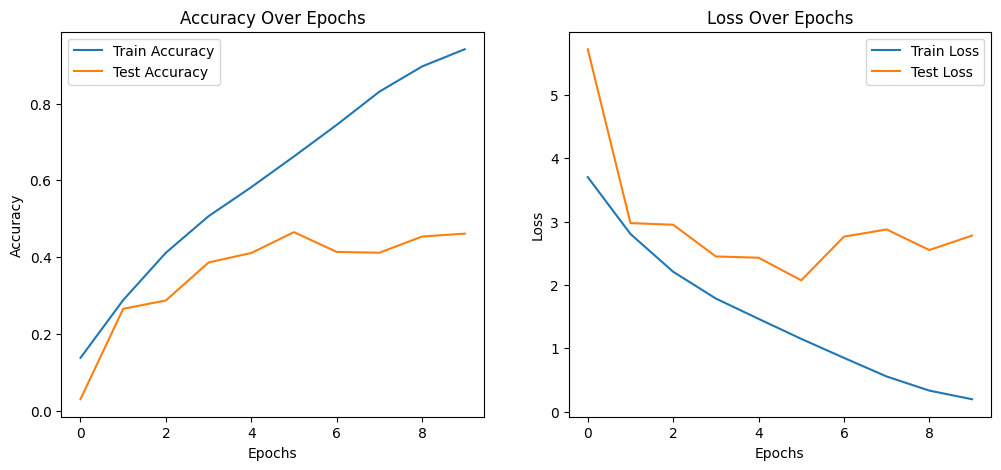

In [6]:
# Evaluate the model
test_loss, test_acc = resnet18_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()